In [99]:
import numpy as np
import pandas as pd

import statsmodels.api as sm
import numpy as np

import edhec_risk_kit_206 as erk

%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/mnt/c/Users/rapha/MEGA/Code/quant-finance/courses/edhec/adv-portconst/edhec_risk_kit_206.py:43: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if filetype is "returns":
/mnt/c/Users/rapha/MEGA/Code/quant-finance/courses/edhec/adv-portconst/edhec_risk_kit_206.py:46: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif filetype is "nfirms":
/mnt/c/Users/rapha/MEGA/Code/quant-finance/courses/edhec/adv-portconst/edhec_risk_kit_206.py:49: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif filetype is "size":


In [100]:
ind = erk.get_ind_returns(n_inds=49)["1991":]
ind.tail()

,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
2018-08,0.0715,0.0114,-0.0308,-0.0186,-0.0543,0.0738,0.0250,-0.0463,0.0254,0.0526,...,-0.0062,0.0291,0.0366,0.0911,0.0364,0.0277,0.0352,-0.0423,0.0004,0.0333
2018-09,-0.0392,-0.0220,0.0310,0.0019,0.0537,0.0717,-0.0075,-0.0209,0.0107,0.0130,...,0.0189,0.0105,-0.0148,0.0061,0.0251,-0.0282,0.0116,-0.0492,-0.0340,0.0068
2018-10,-0.0197,0.0095,0.0118,-0.0157,0.0790,-0.1504,-0.1605,-0.0569,-0.0051,-0.1014,...,-0.1100,-0.0975,-0.0788,-0.1021,-0.0171,-0.0613,-0.0413,-0.1213,-0.0455,-0.0515
2018-11,-0.0357,0.0029,0.0684,0.0579,-0.0843,-0.0715,-0.0001,0.0375,0.0644,-0.0099,...,0.1021,0.0617,0.0318,0.0159,0.0616,0.0292,0.0432,0.0715,0.0006,0.0355
2018-12,-0.1093,-0.1093,-0.0783,-0.0969,-0.1580,-0.1635,-0.0750,-0.1442,-0.0557,-0.0728,...,-0.1248,-0.1519,-0.1121,-0.0919,-0.0628,-0.1279,-0.0985,-0.1172,-0.0874,-0.0654


In [101]:
fff = erk.get_fff_returns()
fff.tail()

,Mkt-RF,SMB,HML,RF
2018-08,0.0344,0.0123,-0.0412,0.0016
2018-09,0.0006,-0.0237,-0.0134,0.0015
2018-10,-0.0768,-0.0468,0.0341,0.0019
2018-11,0.0169,-0.0074,0.0020,0.0018
2018-12,-0.0955,-0.0261,-0.0151,0.0019


In [102]:
industry = 'Beer'

ind_excess = ind[[industry]]['1991':'2018-12'] - fff.loc['1991':'2018-12', ['RF']].values
mkt_excess = fff.loc["1991":'2018-12',['Mkt-RF']]
exp_var = mkt_excess.copy()
exp_var["Constant"] = 1
lm = sm.OLS(ind_excess, exp_var).fit()

In [103]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Beer   R-squared:                       0.226
Model:                            OLS   Adj. R-squared:                  0.224
Method:                 Least Squares   F-statistic:                     97.55
Date:                Mon, 07 Mar 2022   Prob (F-statistic):           2.37e-20
Time:                        14:07:47   Log-Likelihood:                 596.94
No. Observations:                 336   AIC:                            -1190.
Df Residuals:                     334   BIC:                            -1182.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         0.5295      0.054      9.877      0.000       0.424       0.635
Constant       0.0043      0.002      1.892      0.059      -0.000       0.009
==============================================================================
Omnibus:                       20.697   Durbin-Watson:                   2.079
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.130
Skew:                          -0.314   Prob(JB):                     4.31e-10
Kurtosis:                       4.639   Cond. No.                         23.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [109]:
industry = 'Steel'

ind_excess = ind[[industry]]['1991':'2018-12'] - fff.loc['1991':'2018-12', ['RF']].values
mkt_excess = fff.loc["1991":'2018-12',['Mkt-RF']]
exp_var = mkt_excess.copy()
exp_var["Constant"] = 1
lm = sm.OLS(ind_excess, exp_var).fit()

In [110]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Steel   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     572.0
Date:                Mon, 07 Mar 2022   Prob (F-statistic):           2.29e-74
Time:                        14:09:42   Log-Likelihood:                 532.25
No. Observations:                 336   AIC:                            -1061.
Df Residuals:                     334   BIC:                            -1053.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         1.5546      0.065     23.917      0.000       1.427       1.682
Constant      -0.0055      0.003     -2.014      0.045      -0.011      -0.000
==============================================================================
Omnibus:                       24.614   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.413
Skew:                           0.456   Prob(JB):                     6.17e-10
Kurtosis:                       4.482   Cond. No.                         23.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [111]:
industry = 'Beer'

ind_excess = ind[[industry]]['2013':'2018-12'] - fff.loc['2013':'2018-12', ['RF']].values
mkt_excess = fff.loc["2013":'2018-12',['Mkt-RF']]
exp_var = mkt_excess.copy()
exp_var["Constant"] = 1
lm = sm.OLS(ind_excess, exp_var).fit()

In [112]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Beer   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.303
Method:                 Least Squares   F-statistic:                     31.87
Date:                Mon, 07 Mar 2022   Prob (F-statistic):           3.27e-07
Time:                        14:10:27   Log-Likelihood:                 155.66
No. Observations:                  72   AIC:                            -307.3
Df Residuals:                      70   BIC:                            -302.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         0.5860      0.104      5.645      0.000       0.379       0.793
Constant       0.0045      0.003      1.289      0.201      -0.002       0.011
==============================================================================
Omnibus:                        5.069   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.079   Jarque-Bera (JB):                4.535
Skew:                          -0.610   Prob(JB):                        0.104
Kurtosis:                       3.155   Cond. No.                         31.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [113]:
industry = 'Steel'

ind_excess = ind[[industry]]['2013':'2018-12'] - fff.loc['2013':'2018-12', ['RF']].values
mkt_excess = fff.loc["2013":'2018-12',['Mkt-RF']]
exp_var = mkt_excess.copy()
exp_var["Constant"] = 1
lm = sm.OLS(ind_excess, exp_var).fit()

In [114]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Steel   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     62.18
Date:                Mon, 07 Mar 2022   Prob (F-statistic):           2.97e-11
Time:                        14:10:39   Log-Likelihood:                 116.15
No. Observations:                  72   AIC:                            -228.3
Df Residuals:                      70   BIC:                            -223.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         1.4169      0.180      7.885      0.000       1.059       1.775
Constant      -0.0098      0.006     -1.627      0.108      -0.022       0.002
==============================================================================
Omnibus:                        7.128   Durbin-Watson:                   2.188
Prob(Omnibus):                  0.028   Jarque-Bera (JB):                6.420
Skew:                           0.635   Prob(JB):                       0.0403
Kurtosis:                       3.727   Cond. No.                         31.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [115]:
ind_excess = ind['1991':'1993'] - fff.loc['1991':'1993', ['RF']].values
mkt_excess = fff.loc["1991":'1993',['Mkt-RF']]
exp_var = mkt_excess.copy()
exp_var["Constant"] = 1
lm = sm.OLS(ind_excess, exp_var).fit()

In [116]:
results = lm.params
results.columns = ind.columns

In [117]:
results.sort_values(by='Mkt-RF', axis=1, ascending=False)

,Hlth,Softw,Cnstr,Clths,MedEq,Other,Banks,Smoke,Soda,Chips,...,Paper,Telcm,Boxes,RlEst,Guns,Oil,Coal,Util,Mines,Gold
Mkt-RF,1.615195,1.608340,1.520882,1.516927,1.473925,1.454826,1.359233,1.323776,1.319035,1.272863,...,0.717202,0.715867,0.633817,0.599248,0.561699,0.550604,0.529958,0.379527,0.274762,-0.553289
Constant,-0.005447,0.005535,-0.011798,-0.004446,-0.010816,-0.018455,0.007439,-0.018946,-0.006793,0.010627,...,-0.001017,0.003162,0.003219,0.006205,0.007671,-0.001922,-0.009163,0.004555,0.014275,0.010849


In [131]:
ind_excess = ind['1991':'2018'] - fff.loc['1991':'2018', ['RF']].values
mkt_excess = fff.loc["1991":'2018',['Mkt-RF']]
exp_var = mkt_excess.copy()
exp_var["Constant"] = 1

exp_var["Value"] = fff.loc["1991":"2018",['HML']]
exp_var["Size"] = fff.loc["1991":"2018",['SMB']]

In [132]:
lm = sm.OLS(ind_excess, exp_var).fit()

In [133]:
results = lm.params
results.columns = ind.columns

In [134]:
results.loc['Size'].sort_values()

Beer    -0.358655
Drugs   -0.319486
Smoke   -0.307794
Food    -0.267873
Insur   -0.251649
Telcm   -0.194233
Banks   -0.188034
Util    -0.176927
Hshld   -0.171127
Aero    -0.141608
Soda    -0.121587
Meals   -0.094673
Rtail   -0.041055
Paper   -0.029786
Chems   -0.024151
ElcEq   -0.024050
Other   -0.019304
Oil     -0.015416
Guns    -0.007007
Boxes   -0.000577
Trans    0.031009
Clths    0.057455
Softw    0.066100
Fin      0.121906
MedEq    0.125676
Books    0.137026
Agric    0.165856
Ships    0.167156
BldMt    0.195020
Hardw    0.197752
BusSv    0.200393
Autos    0.206325
Hlth     0.234674
Whlsl    0.265499
Mines    0.267865
PerSv    0.273150
Fun      0.281732
Gold     0.289094
Chips    0.319935
Toys     0.329862
Mach     0.353644
Cnstr    0.408917
Rubbr    0.448314
LabEq    0.465178
Steel    0.493311
Coal     0.534373
Txtls    0.535961
RlEst    0.687456
FabPr    0.688508
Name: Size, dtype: float64

In [135]:
results.loc['Value'].sort_values()

Softw   -0.852422
Hardw   -0.690417
Chips   -0.600139
LabEq   -0.261102
Drugs   -0.228132
Telcm   -0.050983
MedEq   -0.045616
BusSv   -0.023917
Beer     0.006329
Rtail    0.021793
Gold     0.123336
Hshld    0.125855
Agric    0.131897
ElcEq    0.132064
Food     0.156536
Fin      0.239309
Meals    0.259776
Smoke    0.266018
Other    0.283131
Boxes    0.283365
Whlsl    0.286591
Util     0.294311
Mach     0.302361
Fun      0.310497
Steel    0.318073
Clths    0.345496
PerSv    0.356625
Soda     0.397642
Oil      0.421705
Toys     0.423761
Aero     0.429772
Trans    0.432217
Books    0.435918
Chems    0.459268
Paper    0.466115
Rubbr    0.466929
Hlth     0.488236
FabPr    0.490916
Coal     0.497821
Mines    0.565671
Insur    0.570370
Guns     0.591323
Cnstr    0.607808
BldMt    0.608665
Ships    0.773196
Autos    0.797194
Banks    0.839294
RlEst    0.896931
Txtls    0.983560
Name: Value, dtype: float64

Now, assume we knew absolutely nothing about this manager and all we observed was the returns. How could we tell what she was invested in?

In [4]:
weights = erk.style_analysis(mgr_r, ind)*100

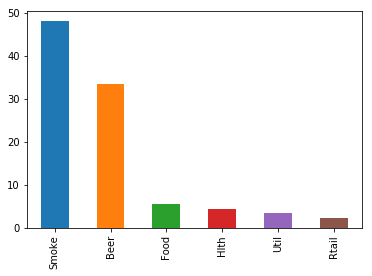

In [5]:
weights.sort_values(ascending=False).head(6).plot.bar()

Contrast this to the results of a regression. Because the model is in fact very true (i.e. we really did construct the manager's returns out of the building blocks), the results are remarkably accurate. However, the negative coefficients are hard to intepret and in real-life data, those will be much larger. However when it works well, such as in this artificial example here, the results can be very accurate.

In [6]:
coeffs = erk.regress(mgr_r, ind).params*100
coeffs.sort_values().head()

Hshld   -3.454557
Steel   -2.279649
Chems   -2.003106
Oil     -1.485098
Meals   -1.411059
dtype: float64

Negative 4.5% in Household?

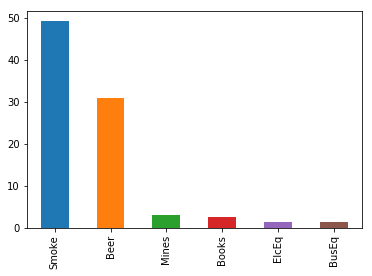

In [7]:
coeffs.sort_values(ascending=False).head(6).plot.bar()

## Style Drift: Time Varying Exposures using Style Anaylsis

One of the most common ways in which Sharpe Style Analysis can be used is to measure style drift. If you run the style analysis function over a rolling window of 1 to 5 years, you can extract changes in the style exposures of a manager.

We'll look at Rolling Windows in the next lab session.

As an exercise to the student, download a set of returns from Yahoo Finance, and try and measure the style drift in your favorite fund manager. Use reliable Value and Growth ETFs such as "SPYG" and "SPYV" along with a SmallCap ETF such as "SLY" and LargeCap ETF such as "OEF".

Alternately, the Fama-French research factors and use the Top and Bottom portfolios by Value (HML) and Size (SMB) to categorize mutual funds into categories. This is very similar to the "Style Box" methodology employed by Morningstar and displayed on their website. Compare your results with their results to see if they agree!

# Warning: Potential Misuse of Style Analysis

Style Analysis works best when the explanatory indices are in fact a good specification of what is happening. For instance, it usually gives you very useful and revealing insight if you use a stock market index (such as SPY) and other broad indices, ETFs or mutual funds (such as a Value Fund, a Growth Fund, an International Fund, a Bond Fund etc).

Part of the skill in extracting meaningful results is to pick the right set of explanatory variables.

However, a part of the challenge with Style Analysis is that it will _always_ return a portfolio. Although it is possible to develop a figure of merit of fit quality similar to an $R^2$, it will still always give you an answer, however unreasonable it might be, and it's not always obvious how much one can rely on the result.

For instance, we can try and extract the major industries that Buffer invested in since 2000 as follows:

In [8]:
brka_m = pd.read_csv("brka_m.csv", index_col=0, parse_dates=True).to_period('M')

In [9]:
mgr_r_b = brka_m["2000":]["BRKA"]
weights_b = erk.style_analysis(mgr_r_b, ind)
weights_b.sort_values(ascending=False).head(6).round(4)*100

Food     41.35
Fin      17.61
Meals    12.11
Other    11.03
Util      7.19
Clths     5.99
dtype: float64

If we want to look at the last decade (2009-2018):

In [10]:
brk2009 = brka_m["2009":]["BRKA"]
ind2009 = ind["2009":]
erk.style_analysis(brk2009, ind2009).sort_values(ascending=False).head(6).round(4)*100

Other    43.64
Food     28.33
Hlth     22.72
Rtail     5.25
Meals     0.07
Books     0.00
dtype: float64

Should you believe the analysis? Probably not. However, when the specification is in fact accurate (as we saw in the articially generated series) the results can be very revealing